In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Функция для создания маски цвета на изображении для заданного rgb-цвета.
def rgb_mask(image, rgb=(0, 0, 0), tolerance=8):
    return np.prod(abs(image - rgb) < tolerance, 2).astype(bool)

In [3]:
# Палитра rgb-цветов, для которой необходимо составить комплексную маску
palette = {'lightblue': [207, 252, 255],
           'pink': [247, 186, 226],
           'purple': [216, 186, 238],
           'lightgreen': [175, 255, 158],
           'green': [102, 210, 110]}

In [4]:
# filename = '2fuse/20180326-ohot.jpg'
filename = 'schema.jpg'
scheme = plt.imread(filename)
h, w, c = scheme.shape

In [5]:
# Составляем комплексную маску
mask = np.zeros((h, w), dtype=bool)
for key, value in palette.items():
    mask += rgb_mask(scheme, value, tolerance=15)

mask = mask.astype(bool)

In [6]:
def morphclosed(image, kernel_size=(3, 3)):
    kernel = np.ones(kernel_size,np.uint8)
    dilated = cv2.dilate(image.astype(np.float32), kernel)
    return cv2.erode(dilated.astype(np.float32), kernel)

In [7]:
from scipy.ndimage import binary_fill_holes

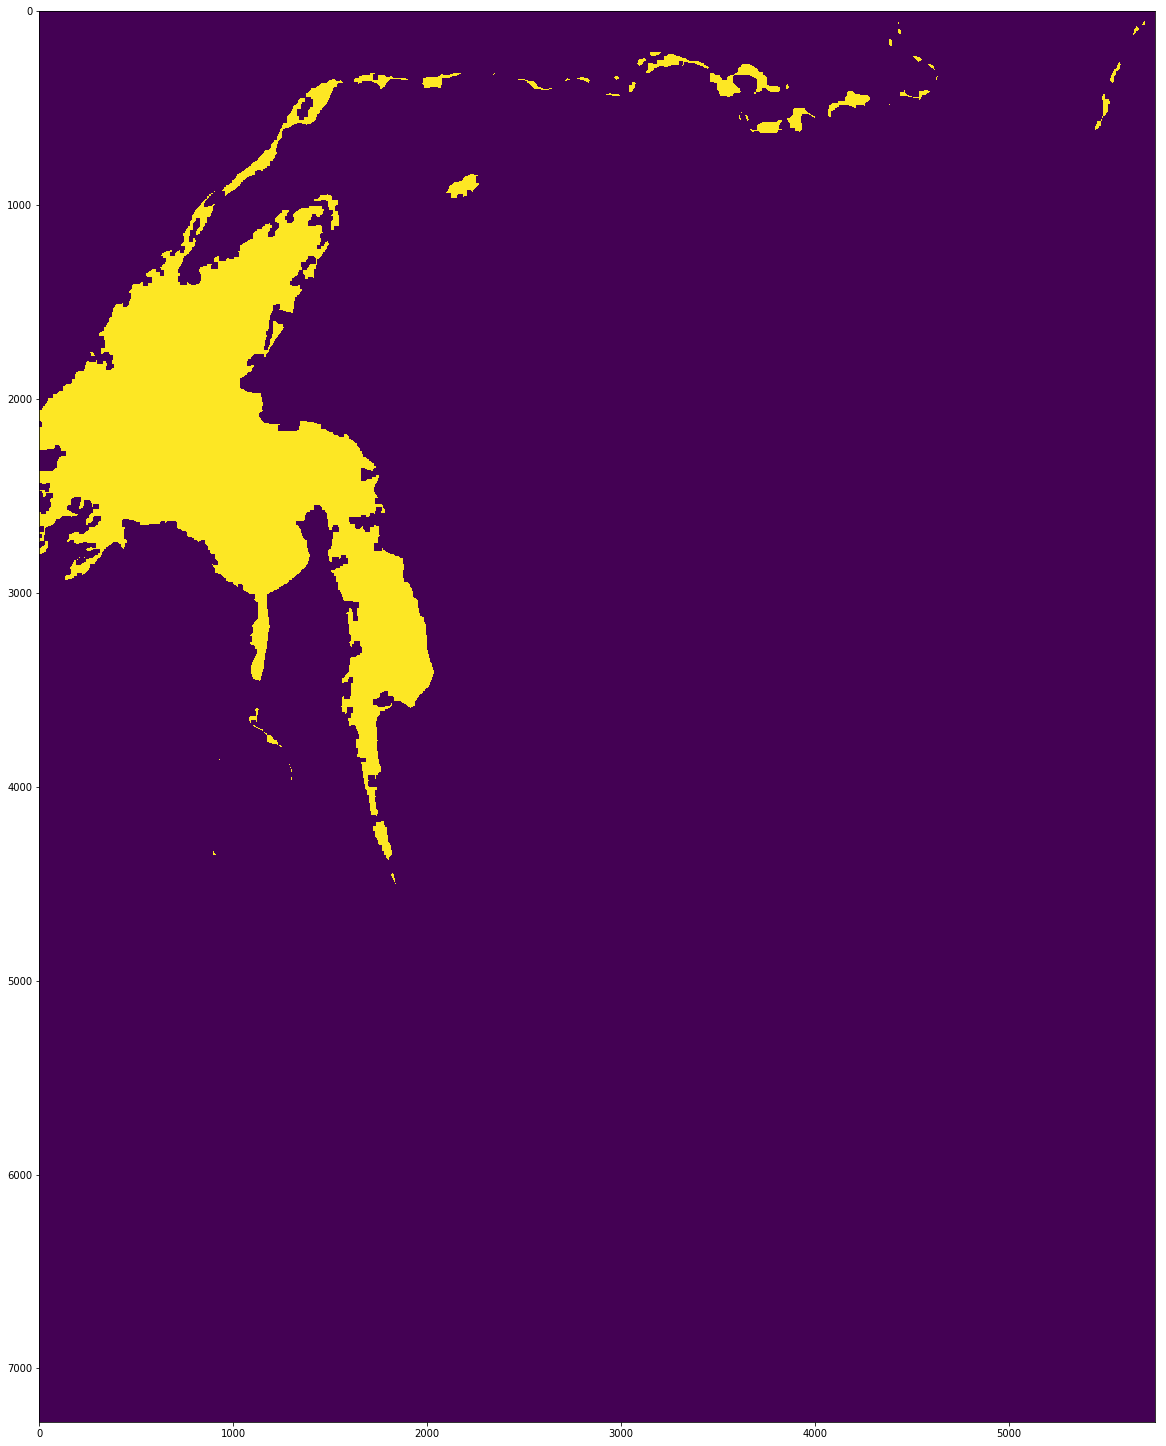

In [8]:
# todo: Морфологическое закрытие
mask_closed = morphclosed(mask, kernel_size=(21, 21))

plt.figure(figsize=(20, 50))
# убираем артефакты от легенды
mask_closed[4600:, :] = 0

mask_closed_wo_holes = binary_fill_holes(mask_closed)

# plt.imshow(mask_closed_wo_holes)


icemask = mask_closed_wo_holes
plt.imshow(icemask)


In [9]:
# Спутниковый снимок
filename = '/Users/loki/PycharmProjects/ds-icedetection/data/collection/2015-02-05_03-34-58_NOAA 19_NOAA_20150206_133842__n90886.1_pro.png'
satimg = plt.imread(filename)

In [10]:
# Преобразуем "серый" спутниковый снимок в rgb-изображение с активным r-каналом.
satimg_r = satimg * np.array([1, 0, 0])
h, w, c = satimg_r.shape

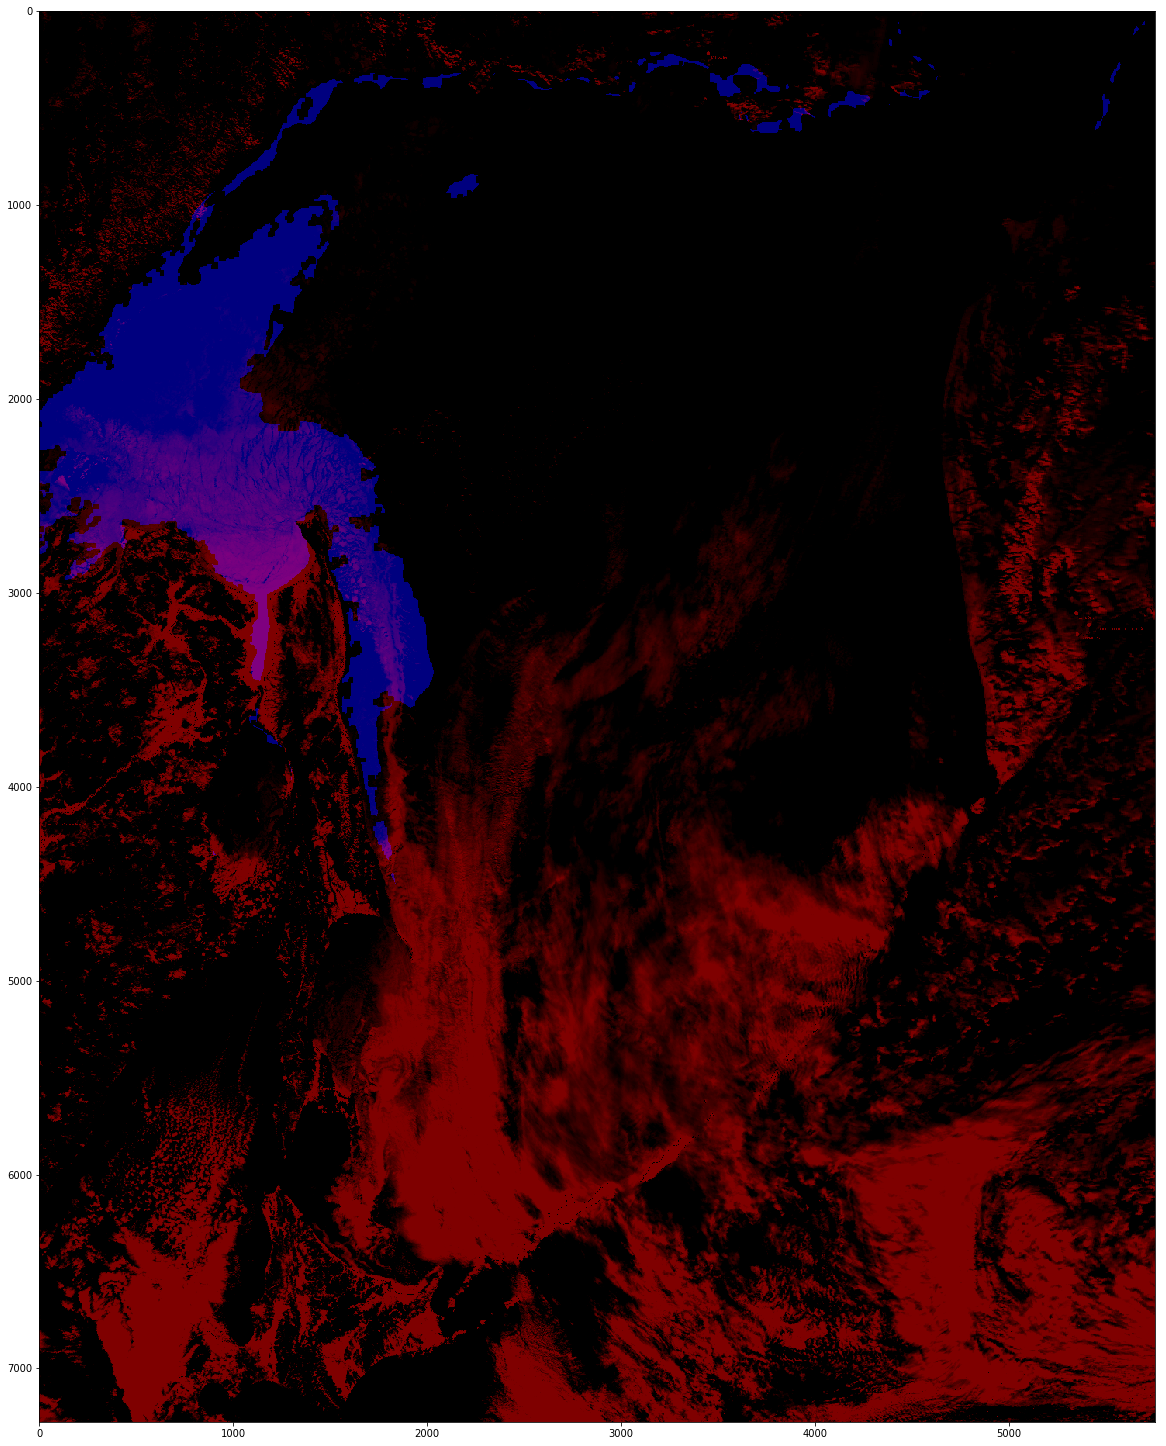

In [19]:
#
# mask_resized = cv2.resize(icemask.astype(np.float32), dsize=(w, h))
layer = cv2.cvtColor(icemask.astype(np.float32), cv2.COLOR_GRAY2RGB) * np.array([0, 0, 1], dtype=np.float32)
scheme_layer = layer.astype(np.float32)

result = cv2.addWeighted(satimg_r.astype(np.float32), 0.5, scheme_layer, 0.5, gamma=0)
#
plt.figure(figsize=(20,50))
plt.imshow(result)
plt.show()

In [20]:
# выделяем маску синего контура, контура суши.
contour = np.prod(satimg == np.array([0, 0, 1]), 2)

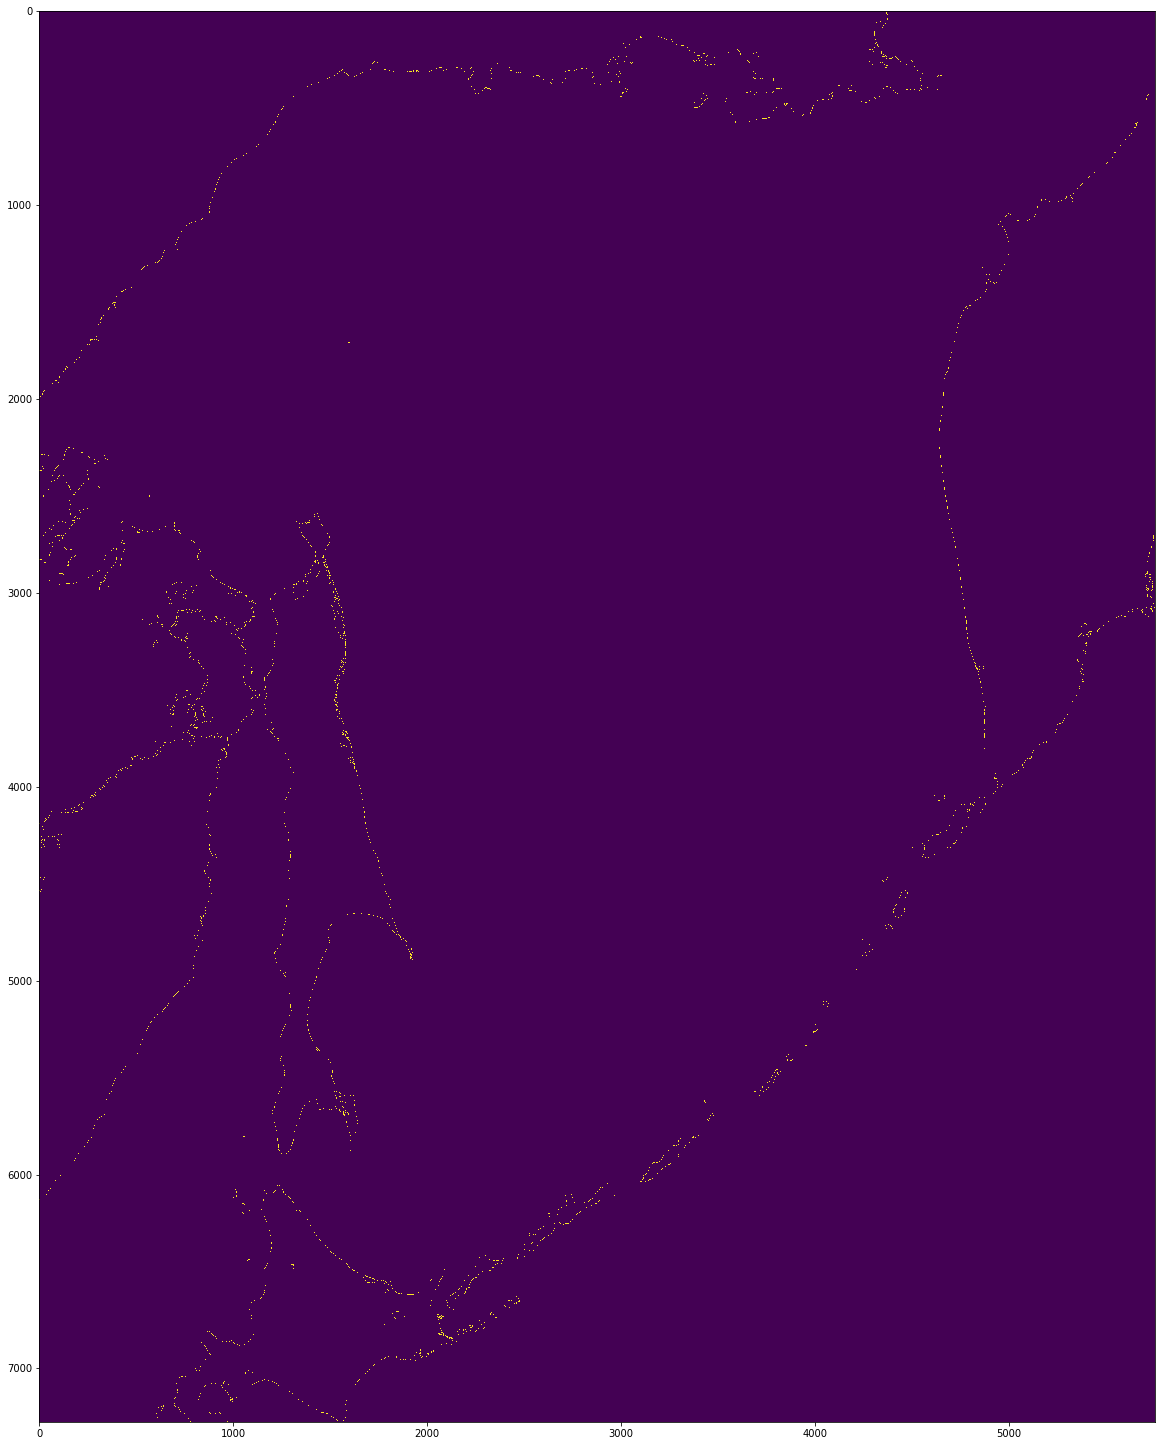

In [21]:
# Визуализируем контур
plt.figure(figsize=(20, 50))
plt.imshow(contour)

In [22]:
# Расширяем линию контура с помощью дилатации
kernel = np.ones((11,11),np.uint8)
dilated = cv2.dilate(contour.astype(np.float32), kernel)

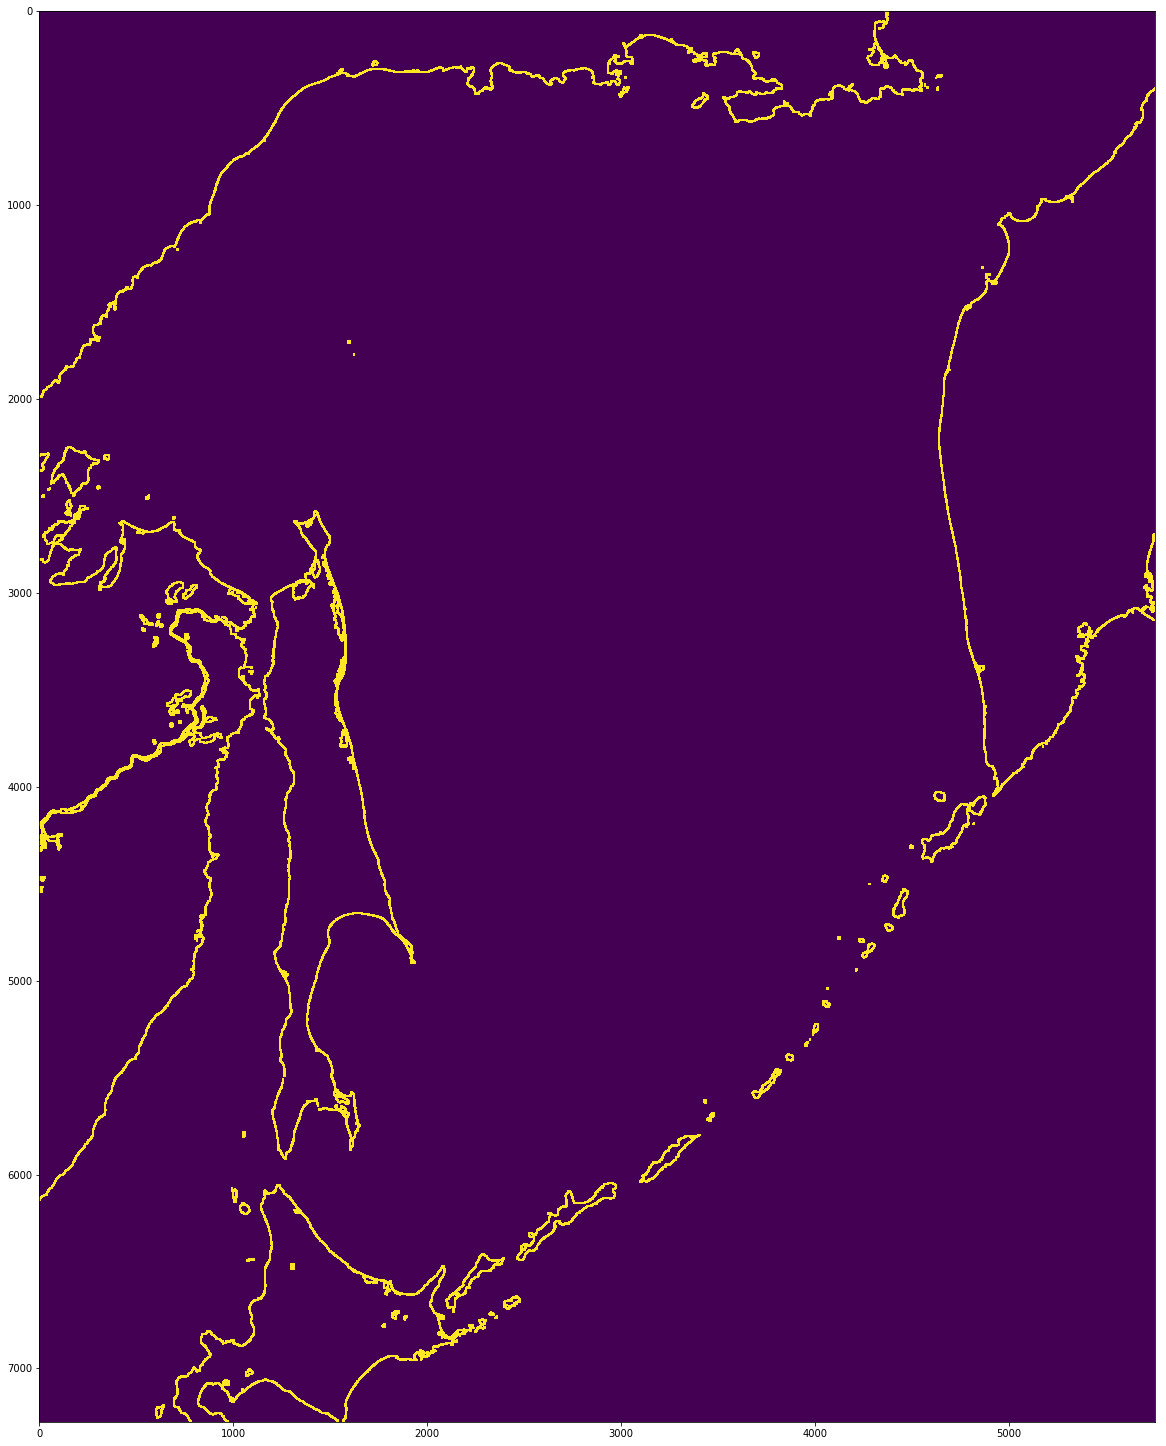

In [23]:
plt.figure(figsize=(20, 50))
plt.imshow(dilated)

In [24]:
# Преобразуем маску контура в rgb-маску с активным R-каналом.
layer = cv2.cvtColor(dilated.astype(np.float32), cv2.COLOR_GRAY2RGB) * np.array([1, 0, 0], dtype=np.float32)
layer = layer.astype(np.float32)

In [25]:
# Наносим маску контура на спутниковый снимок
satimg_enh = cv2.addWeighted(satimg, 0.5, layer, 0.5, gamma=0)

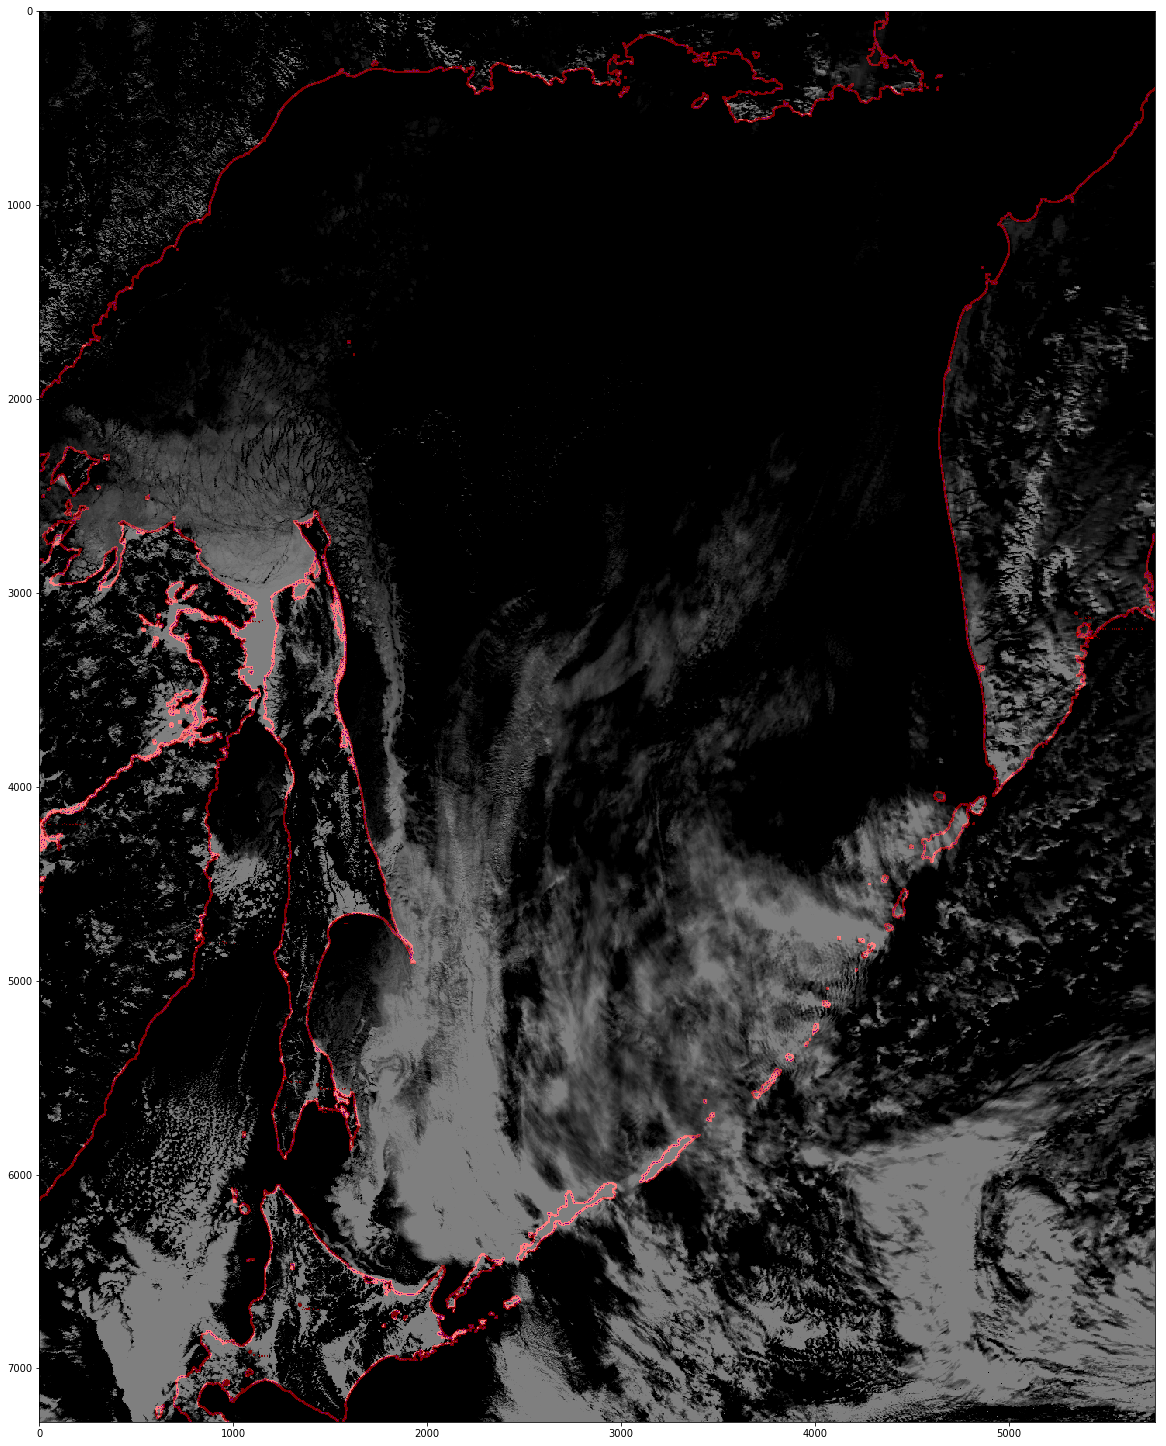

In [26]:
plt.figure(figsize=(20, 50))
plt.imshow(satimg_enh)

In [27]:
# Наносим маску схемы на спутниковый снимок
compl = cv2.addWeighted(satimg_enh, 0.5, scheme_layer, 0.5, gamma=0)

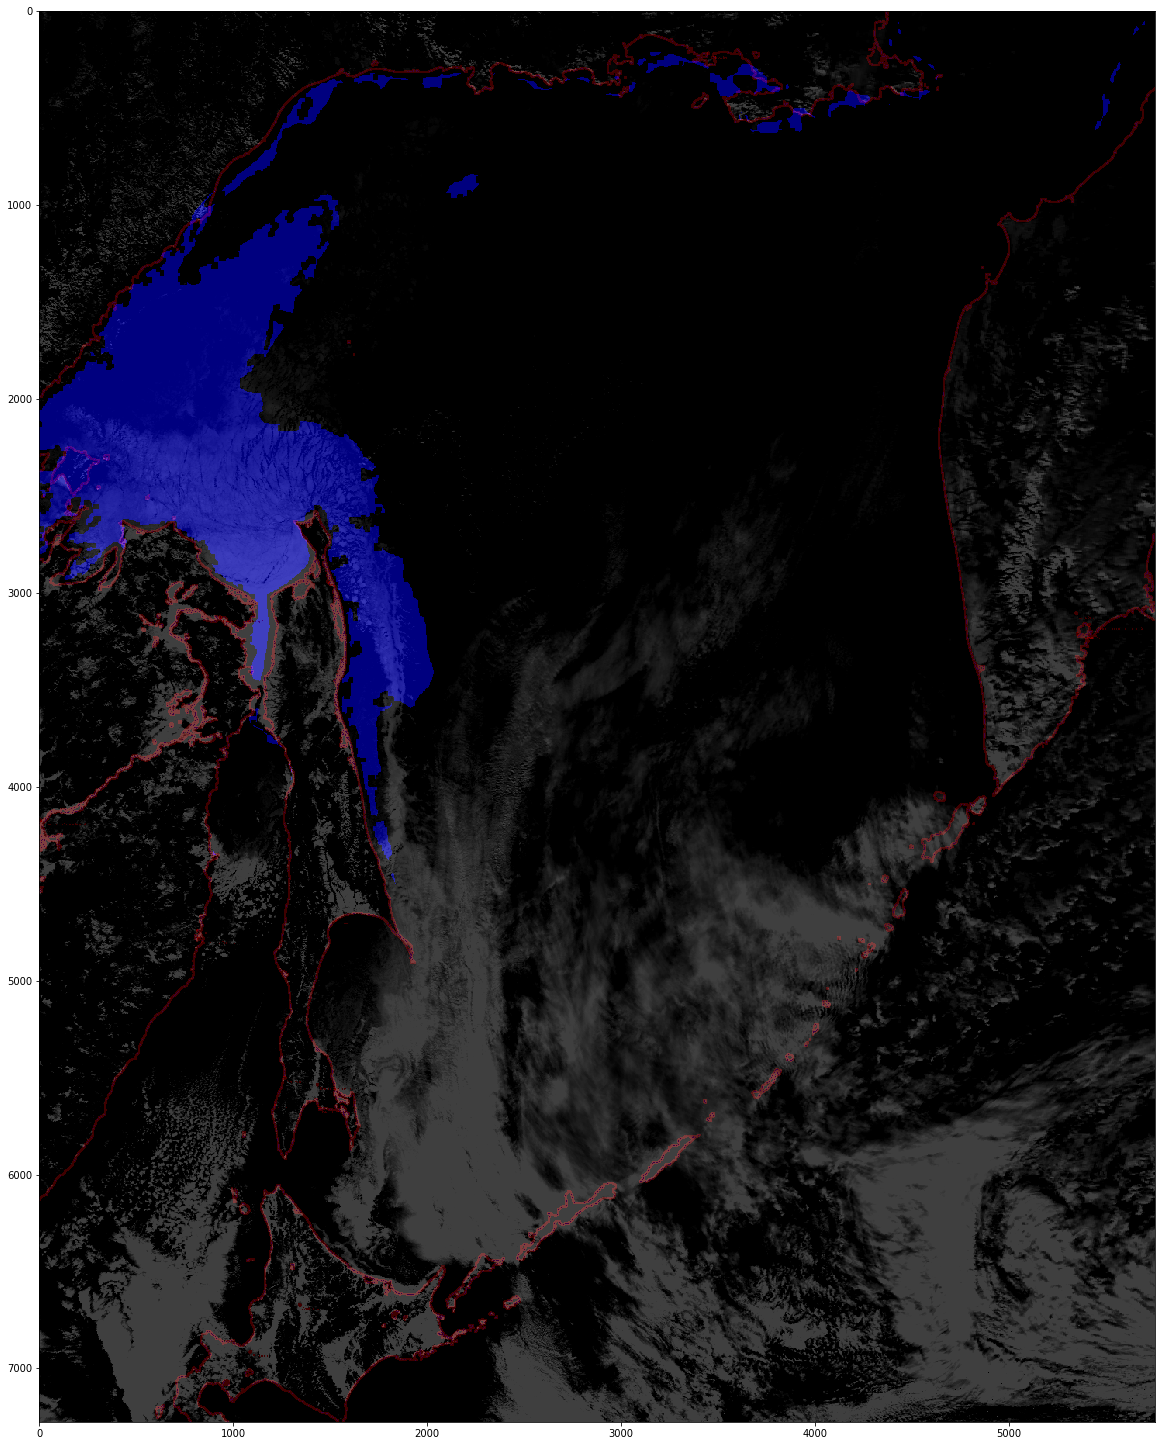

In [28]:
plt.figure(figsize=(20, 50))
plt.imshow(compl)

In [139]:
# # Находим преобразование для двух наборов точек
# points = [
# [ 1011 , 951 ], [ 4925 , 4032 ],
# [ 746 , 1323 ], [ 3353 , 5802 ],
# [ 556 , 1460 ], [ 2465 , 6429 ],
# [ 476 , 1466 ], [ 2081 , 6473 ],
# [ 301 , 1363 ], [ 1233 , 6053 ],
# [ 206 , 1515 ], [ 869 , 6809 ],
# [ 128 , 1262 ], [ 333 , 5683 ],
# [ 174 , 1207 ], [ 501 , 5397 ],
# [ 279 , 1022 ], [ 921 , 4357 ],
# [ 328 , 896 ], [ 1101 , 3613 ],
# [ 322 , 1128 ], [ 1213 , 4858 ],
# [ 313 , 1335 ], [ 1265 , 5917 ],
# [ 346 , 1276 ], [ 1429 , 5918 ],
# [ 382 , 1331 ], [ 1605 , 5870 ],
# [ 460 , 1146 ], [ 1925 , 4906 ],
# [ 400 , 726 ], [ 1425 , 2580 ],
# [ 355 , 793 ], [ 1193 , 3020 ],
# [ 280 , 719 ], [ 693 , 2632 ],
# [ 224 , 736 ], [ 393 , 2764 ],
# [ 167 , 753 ], [ 53 , 2940 ],
# [ 336 , 484 ], [ 701 , 1213 ],
# [ 451 , 384 ], [ 1561 , 313 ],
# [ 546 , 406 ], [ 2256 , 421 ],
# [ 756 , 395 ], [ 3837 , 389 ],
# [ 856 , 375 ], [ 4553 , 313 ],
# [ 943 , 470 ], [ 5005 , 1041 ],
# [ 947 , 841 ], [ 4837 , 3380 ],
# ]

In [57]:
filename = 'data/1607/schema.jpg'
schema = plt.imread(filename)
# Составляем комплексную маску
mask = np.zeros((h, w), dtype=bool)
for key, value in palette.items():
    mask += rgb_mask(scheme, value, tolerance=15)

mask = mask.astype(bool)

In [61]:
filename = 'data/1607/satimg.png'
satimg = plt.imread(filename)

In [62]:
satimg.shape

(7276, 5756, 3)

In [81]:
ice_layer = (cv2.cvtColor(mask.astype(np.float32), cv2.COLOR_GRAY2RGB) * np.array([1, 1, 1], dtype=np.float32)).astype(np.float32)
sat_layer = (satimg * np.array([0, 1, 0], dtype=np.float32)).astype(np.float32)
result = cv2.addWeighted(ice_layer, 1, sat_layer, 1, gamma=0)

In [82]:
contour_layer = cv2.cvtColor(dilated.astype(np.float32), cv2.COLOR_GRAY2RGB) * np.array([1, 0, 0], dtype=np.float32)
result = cv2.addWeighted(contour_layer, 1, result, 0.5, gamma=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


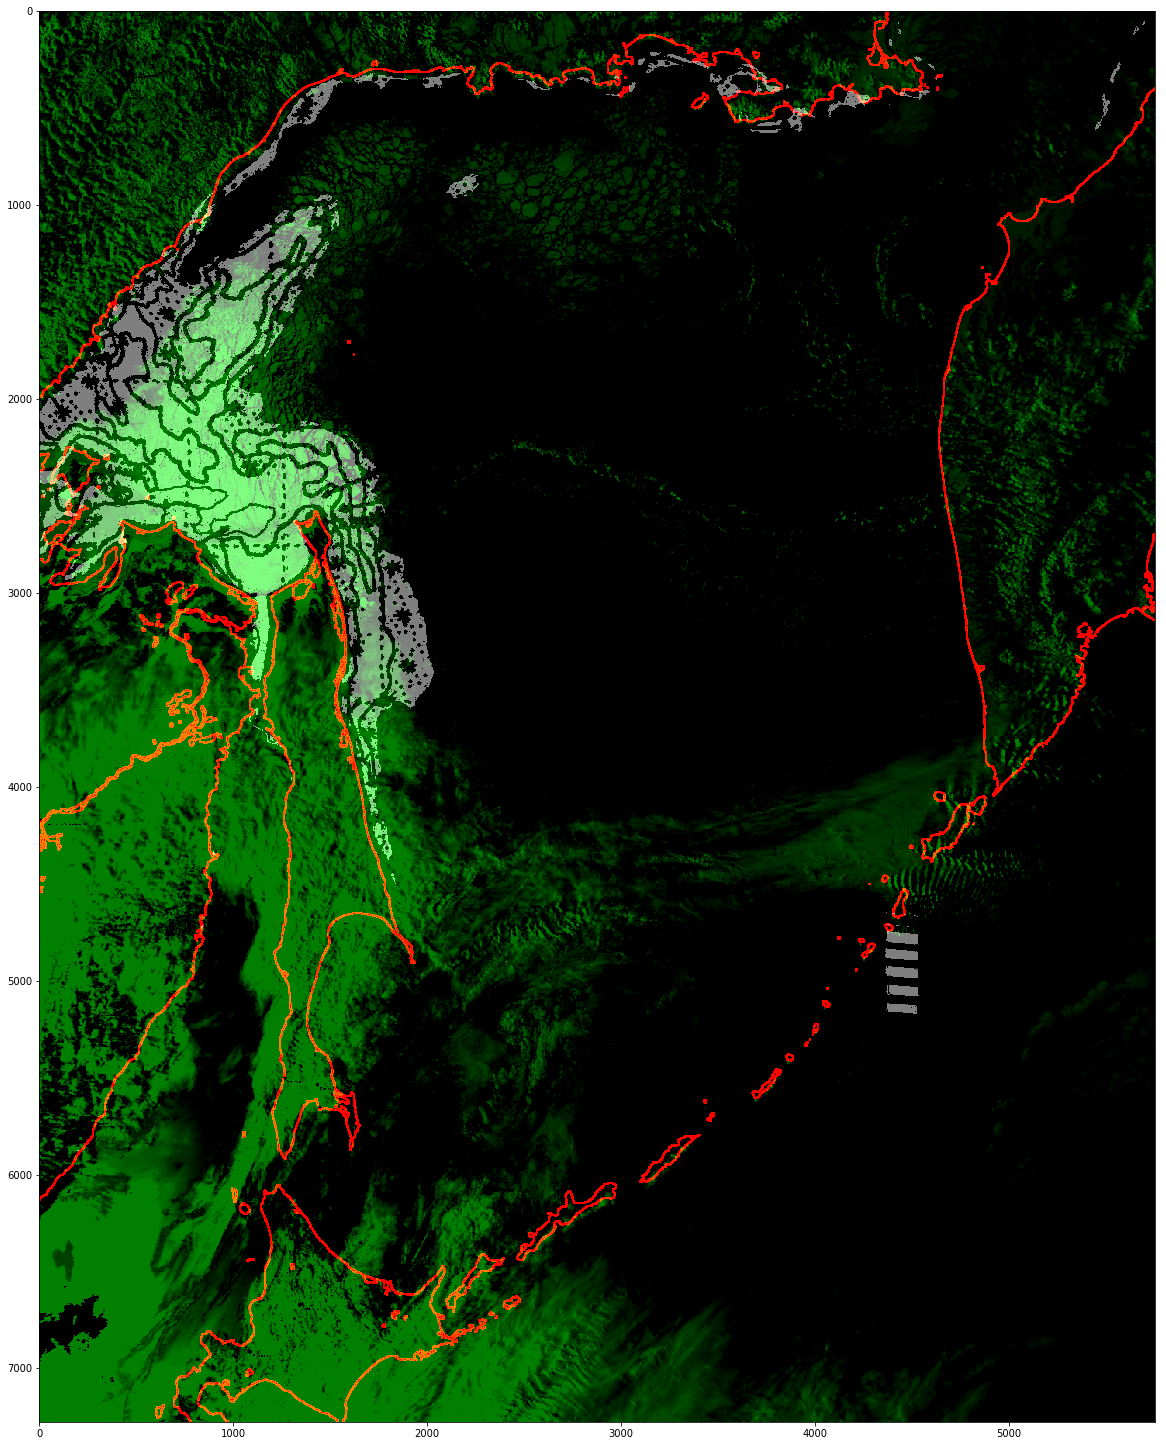

In [83]:
plt.figure(figsize=(20, 50))
plt.imshow(result)

In [84]:
crop = result[0:4500, :]

In [89]:
import matplotlib.patches as mpatches

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


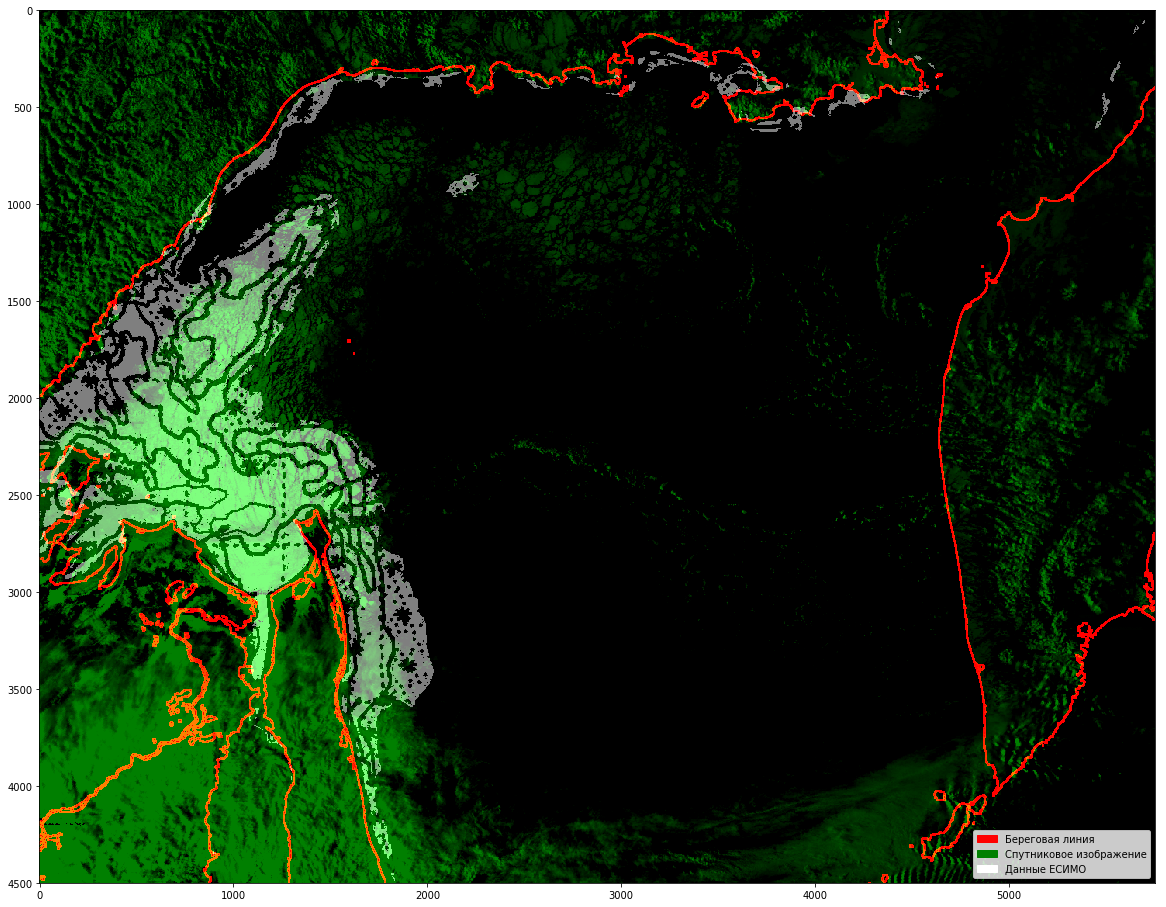

In [91]:
plt.figure(figsize=(20, 50))
plt.imshow(crop)


red_patch = mpatches.Patch(color='red', label='Береговая линия')
green_patch = mpatches.Patch(color='green', label='Спутниковое изображение')
white_patch = mpatches.Patch(color='white', label='Данные ЕСИМО')
plt.legend(handles=[red_patch, green_patch, white_patch], loc=4)
plt.imsave("crop.png", crop)


